# Model: Logistic Regression with all the columns

In this notebook, all the training/predictions steps are implemented for a very basic model (logistic regression with all the features). 
The goal is to get the best f1-score ! May the force be with you 🧨🧨  

# Import libraries

In [93]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score,precision_score, RocCurveDisplay
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from IPython.display import display

# Read file with labels

In [94]:
data = pd.read_csv('../data/processed/conversion_data_train_EDA_output.csv', index_col=0)
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284578, 7)


In [95]:
data.head()

,country,age,new_user,source,total_pages_visited,converted,total_pages_visited_x3
0,China,22,1,Direct,2,0,8
1,UK,21,1,Ads,3,0,27
2,Germany,20,0,Seo,14,1,2744
3,US,23,1,Seo,3,0,27
4,US,28,1,Direct,3,0,27


# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

In [96]:
target_variable = 'converted'
X = data.drop(columns=[target_variable])
Y = data.loc[:, target_variable]
print('Explanatory variables : ', X.columns)
print()

Explanatory variables :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'total_pages_visited_x3'],
      dtype='object')



In [97]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=925662591, stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Training pipeline

In [98]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

# Create pipeline for numeric features
display(X.select_dtypes(exclude='object') )
numeric_features = X.select_dtypes(exclude='object').columns  # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(
    steps=[
        (
            "scaler", 
            StandardScaler()
        ),
    ]
)

display(X.select_dtypes(include='object') )

# Create pipeline for categorical features
categorical_features = X.select_dtypes(include='object').columns  # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
        (
            "encoder",
            OneHotEncoder(drop="first"),
        ),  # first column will be dropped to avoid creating correlations between features
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
print("...Done.")
print(
    X_train[0:5]
)  # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

Encoding categorical features and standardizing numerical features...


,age,new_user,total_pages_visited,total_pages_visited_x3
0,22,1,2,8
1,21,1,3,27
2,20,0,14,2744
3,23,1,3,27
4,28,1,3,27
...,...,...,...,...
284575,36,1,1,1
284576,31,1,2,8
284577,41,1,5,125
284578,31,1,4,64


,country,source
0,China,Direct
1,UK,Ads
2,Germany,Seo
3,US,Seo
4,US,Direct
...,...,...
284575,US,Ads
284576,US,Seo
284577,US,Seo
284578,US,Direct


Performing preprocessings on train set...
       country  age  new_user  source  total_pages_visited  \
141530      UK   35         0     Seo                    4   
106919      US   20         1  Direct                    2   
22695       US   51         0     Ads                    1   
97132       US   43         1     Ads                    3   
262631   China   26         1     Seo                    1   

        total_pages_visited_x3  
141530                      64  
106919                       8  
22695                        1  
97132                       27  
262631                       1  
...Done.
[[ 0.53818446 -1.47733786 -0.26240158 -0.29822833  0.          1.
   0.          0.          1.        ]
 [-1.27883574  0.67689324 -0.86012784 -0.36004425  0.          0.
   1.          1.          0.        ]
 [ 2.47633934 -1.47733786 -1.15899097 -0.36777124  0.          0.
   1.          0.          0.        ]
 [ 1.5072619   0.67689324 -0.56126471 -0.33907099  0.          

In [99]:
# Train model
print("Train model...")
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [100]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



## Test pipeline

In [101]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding categorical features and standardizing numerical features...")

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head())
X_test = preprocessor.transform(
    X_test
)  # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print("...Done.")
print(
    X_test[0:5, :]
)  # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Encoding categorical features and standardizing numerical features...
Performing preprocessings on test set...
       country  age  new_user  source  total_pages_visited  \
60969    China   35         0     Seo                    4   
375      China   27         0     Seo                    9   
92712       US   26         1     Ads                   11   
68129       US   19         1     Ads                    5   
190999   China   41         0  Direct                    5   

        total_pages_visited_x3  
60969                       64  
375                        729  
92712                     1331  
68129                      125  
190999                     125  
...Done.
[[ 0.53818446 -1.47733786 -0.26240158 -0.29822833  0.          0.
   0.          0.          1.        ]
 [-0.43089298 -1.47733786  1.23191406  0.43583565  0.          0.
   0.          0.          1.        ]
 [-0.55202766  0.67689324  1.82964032  1.10035674  0.          0.
   1.          0.          0.    

In [102]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 1]



## Performance assessment

In [103]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.763820712963708
f1-score on test set :  0.7585537490900267


In [104]:
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test,Y_test_pred))
print()

print("recall-score on training set: ", recall_score(Y_train, Y_train_pred))
print("recall-score on training set: ", recall_score(Y_test, Y_test_pred))
print()

print("precision-score on training set: ", precision_score(Y_train, Y_train_pred))
print("precision-score on test set: ", precision_score(Y_test, Y_test_pred))

accuracy on training set :  0.9862486119765922
accuracy on test set :  0.986014477475578

f1-score on training set :  0.763820712963708
f1-score on test set :  0.7585537490900267



recall-score on training set:  0.6895249164608456
recall-score on training set:  0.681045751633987

precision-score on training set:  0.8560606060606061
precision-score on test set:  0.8559693318729463


In [105]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[205752    798]
 [  2137   4746]]

Confusion matrix on test set : 
[[68587   263]
 [  732  1563]]



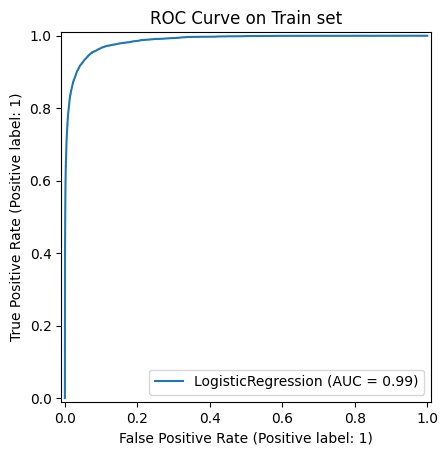

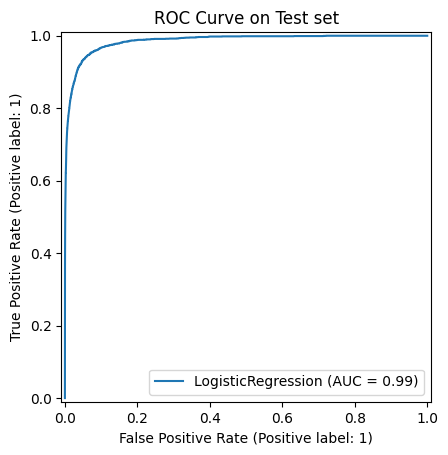

In [106]:
_, ax = plt.subplots()
ax.set(
    title="ROC Curve on Train set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    classifier, X_train, Y_train, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()

_, ax = plt.subplots()  # Get subplot from matplotlib
ax.set(
    title="ROC Curve on Test set"
)  # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(
    classifier, X_test, Y_test, ax=ax
)  # RocCurveDisplay from sklearn
plt.show()

**We improved our f1-score at 76% on the test and train sets. 🚀🚀**

# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [107]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test, axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression()

In [108]:
# Read data without labels
data_without_labels = pd.read_csv('../data/raw/conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

Prediction set (without labels) : (31620, 5)


In [109]:
data_without_labels['total_pages_visited_x2'] = data_without_labels['total_pages_visited'] ** 2
data_without_labels['total_pages_visited_x3'] = data_without_labels['total_pages_visited'] ** 3
data_without_labels['total_pages_visited_age'] = data_without_labels['total_pages_visited'] * data_without_labels['age']
data_without_labels['total_pages_visited_age_x2'] = (data_without_labels['total_pages_visited'] * data_without_labels['age']) ** 2 

In [110]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(data_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.3097583  -1.47733786  3.32395597  4.15251753  0.          1.
   0.          0.          1.        ]
 [-1.03656638  0.67689324  0.03646155 -0.23089314  0.          1.
   0.          1.          0.        ]
 [ 0.17478042  0.67689324 -1.15899097 -0.36777124  0.          0.
   0.          0.          1.        ]
 [ 0.17478042  0.67689324  0.33532467 -0.13044228  0.          0.
   1.          0.          0.        ]
 [-0.67316234 -1.47733786 -0.56126471 -0.33907099  0.          0.
   0.          0.          1.        ]]


In [111]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('../data/processed/conversion_data_test_predictions_Nicolas-LogReg-fe.csv', index=False)
